<a href="https://colab.research.google.com/github/Sabelo-Sabs/Machine-Learning-2021/blob/main/Human_Activity_Recognition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA- Exploratory Data Analysis

Importing libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
# Creates a default background
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['figure.facecolor'] = '#00000000'

Loading the data

In [5]:
train = pd.read_csv("train-1.csv")
test = pd.read_csv("test.csv")

Generaly a train dataset contains 70% of the data whereas the test data has 30%. Training data is the initial dataset you use to teach a machine learning application to recognize patterns or perform to your criteria, while testing or validation data is used to evaluate your model's accuracy

Quick Overview


In [6]:
train.sample(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
1189,0.272183,-0.018254,-0.101465,-0.988437,-0.975221,-0.970075,-0.990743,-0.974996,-0.972269,-0.928476,...,-0.480920,0.321764,-0.498381,0.731490,0.791581,-0.834937,-0.019338,0.027106,6,SITTING
4478,0.298161,-0.008347,-0.077776,-0.094914,0.128507,-0.296885,-0.106885,-0.078749,-0.347701,0.015725,...,0.390564,-0.212105,0.308947,0.888189,0.695890,-0.764842,0.249581,-0.042833,22,WALKING
1764,0.276945,-0.016509,-0.107202,-0.998669,-0.995253,-0.989952,-0.999079,-0.996315,-0.990479,-0.942342,...,-0.940025,0.214583,-0.032948,0.177303,-0.064871,-0.914234,0.098670,0.081434,8,STANDING
1957,0.274004,-0.017201,-0.105160,-0.988568,-0.990207,-0.989420,-0.990159,-0.990866,-0.988939,-0.939828,...,0.195481,0.017212,-0.001227,0.445005,-0.045465,0.344343,-0.790052,-0.114508,11,LAYING
5960,0.278354,-0.016345,-0.111278,-0.985230,-0.988805,-0.990760,-0.985383,-0.987864,-0.990653,-0.930099,...,-0.950759,0.332895,0.404353,0.222148,0.056738,0.604472,-0.363929,-0.648498,27,LAYING
6863,0.278074,-0.018289,-0.108240,-0.994240,-0.977522,-0.982498,-0.994879,-0.972893,-0.981332,-0.936879,...,-0.856223,0.018276,-0.126989,-0.353334,0.040350,-0.701237,-0.037565,-0.145975,29,SITTING
2372,0.225555,-0.035080,-0.102129,-0.362775,0.175675,0.394620,-0.411136,0.184621,0.334887,-0.215964,...,-0.921480,0.340592,0.785576,0.951338,-0.154511,-0.422257,0.305634,0.361391,14,WALKING_UPSTAIRS
4824,0.222901,-0.051832,-0.160383,-0.255943,0.147925,0.339149,-0.289839,-0.026587,0.325093,-0.059790,...,-0.640203,0.149000,0.760934,-0.568445,-0.143693,-0.799440,0.197172,0.118742,23,WALKING
4803,0.227920,-0.033946,-0.094711,-0.367742,-0.060711,0.190148,-0.403146,-0.217358,0.189628,-0.122904,...,-0.383312,0.464825,-0.503228,-0.684917,-0.591868,-0.738905,0.211950,0.162907,23,WALKING
6993,0.278924,-0.012531,-0.103381,-0.997952,-0.984378,-0.996386,-0.998014,-0.985879,-0.995703,-0.944525,...,-0.910540,0.057768,-0.004606,0.887598,-0.469903,-0.820962,0.212667,0.066544,30,STANDING


In [7]:
test.sample(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
612,0.214633,-0.014642,-0.110180,-0.126711,0.022900,-0.358730,-0.196512,-0.055697,-0.366916,-0.026577,...,-0.884928,0.932398,0.633892,-0.855948,-0.719442,-0.763195,0.254592,-0.031498,4,WALKING_UPSTAIRS
1197,0.212084,-0.037679,-0.123445,-0.187770,-0.192030,0.002719,-0.289694,-0.184129,-0.038144,0.256589,...,-0.616569,0.638179,-0.483194,0.300068,-0.433120,-0.845475,-0.012389,0.020249,10,WALKING_UPSTAIRS
2406,0.287704,-0.007953,-0.115227,-0.952522,-0.824696,-0.845641,-0.957962,-0.827181,-0.842866,-0.889900,...,-0.486683,0.030053,-0.172914,-0.092886,-0.434914,-0.568201,0.393371,-0.023707,20,STANDING
1120,0.286209,-0.016788,-0.109094,-0.983382,-0.957773,-0.980553,-0.986558,-0.965557,-0.982229,-0.915878,...,-0.565336,0.059062,0.537018,0.628884,-0.807808,0.536024,0.999756,-0.183605,10,LAYING
1691,0.269201,0.007699,-0.115564,-0.257762,-0.064638,-0.019447,-0.302935,-0.121178,0.033254,0.053356,...,-0.759061,0.234895,-0.689379,0.903051,-0.195110,-0.480890,0.318934,0.301747,13,WALKING_UPSTAIRS
1339,0.336729,-0.003416,-0.101019,-0.326256,-0.151900,-0.370890,-0.373333,-0.191575,-0.394530,0.002707,...,-0.639916,-0.472735,-0.449164,0.240449,0.754238,-0.723322,0.253638,0.132074,12,WALKING_UPSTAIRS
2538,0.269021,-0.002859,-0.134360,0.039126,0.788239,-0.319801,-0.077646,0.640791,-0.327812,0.508288,...,0.069981,0.251758,-0.128921,0.860711,0.075836,-0.714801,0.289107,-0.031660,20,WALKING_DOWNSTAIRS
2887,0.277149,0.003709,-0.113742,-0.594104,-0.093302,-0.441025,-0.626089,-0.136955,-0.424460,-0.514281,...,-0.313433,0.071932,-0.594592,0.482462,0.103639,-0.809132,0.180466,0.125399,24,WALKING
1887,0.277531,-0.015711,-0.113100,-0.996947,-0.987280,-0.986408,-0.997356,-0.986709,-0.985017,-0.943070,...,-0.851327,0.089625,-0.773657,0.850890,0.864327,-0.796150,0.235521,-0.014485,18,STANDING
2214,0.279295,0.001415,-0.103023,-0.995494,-0.889959,-0.963252,-0.996242,-0.906725,-0.961104,-0.936202,...,-0.519654,0.061595,0.118597,0.875498,-0.874181,-0.817255,0.197172,-0.063803,20,STANDING


In [8]:
print(f"The train dataset has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"The test dataset has {test.shape[0]} rows and {test.shape[1]} columns")

print(f"This is a total of {train.shape[0] + test.shape[0]} rows and {len(train.columns)} features")

The train dataset has 7352 rows and 563 columns
The test dataset has 2947 rows and 563 columns
This is a total of 10299 rows and 563 features


Dataset Cleaning
- Outliers
- Filling null values
- Check for data imbalance

In [9]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


We can't have Outliers. All the values are squeezed between -1 to 1.

In [10]:
#Finding duplicates
print(f"Total Duplicates Train: {sum(train.duplicated())} \n")
print(f"Total Duplicates in Test: {sum(test.duplicated())} \n")

Total Duplicates Train: 0 

Total Duplicates in Test: 0 



In [11]:
#Finding null values
print(f"Total Null values in Train: {train.isnull().values.sum()}\n")
print(f"Total Null values in Test: {test.isnull().values.sum()} \n")

Total Null values in Train: 0

Total Null values in Test: 0 



Check for imbalanced dataset, we shouldn't find much variation between the distribution accross activities and subjects.


In [12]:

px.histogram(train, x= "Activity", barmode="group")

In [13]:
px.histogram(train, x="subject", color= "Activity", barmode="group")

In [14]:
px.histogram(train, x= 'subject', color = "subject")

We can tell that each subjects has almost equal or less amount of data. There is no any huge amount of gap between them.

Correcting some feature names

In [15]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

There are some brackets between the column's name. We will remove all these brackets quickly. So it's easier for us to type correctly later.

In [16]:
columns = train.columns

## Removing ()
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')
columns = columns.str.replace('[()]','')

train.columns = columns
test.columns = columns


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.



In [17]:
train.sample()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
2811,0.285081,0.002841,-0.135985,-0.278698,0.285019,-0.586212,-0.370973,0.211739,-0.567224,0.004817,...,-0.791209,0.058053,-0.32889,-0.618971,0.319556,-0.784851,0.242268,-0.019891,15,WALKING


Looking at the sample I've generated I can tell the features have a nicer look.

Difference Between Static and Dynamic Activities
- Static refers to non-motion subjects
- Dynamic refers to when theres movement in subjects

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

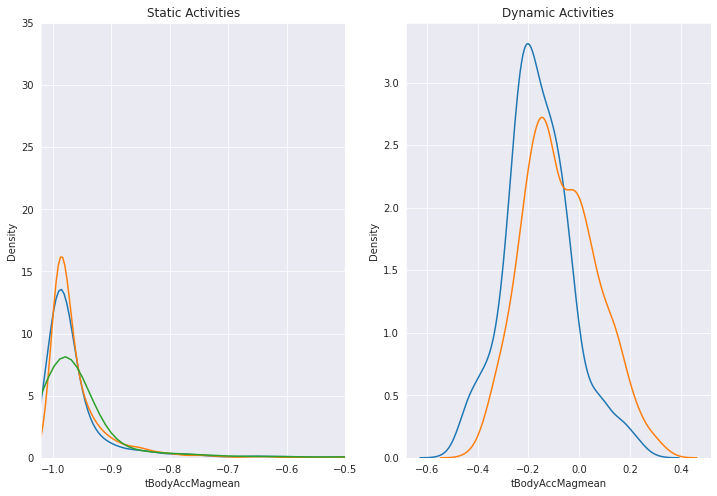

In [18]:

plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title("Static Activities")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMagmean'], hist = False, label = 'Sitting');
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMagmean'], hist = False, label = 'Standing');
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMagmean'], hist = False, label = 'Laying');
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities")
sns.distplot(train[train["Activity"]=="WALKING"]["tBodyAccMagmean"], hist = False, label ="Sitting");
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'], hist = False, label = 'Laying');

------------

Visualizing data using t-SNE
Using t-SNE data can be visualized from a extermely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unique featuers, using t-SNE let's visualze it to a 2D space.

In [19]:
from sklearn.manifold import TSNE
X_for_TSNE = train.drop(['subject','Activity'], axis = 1)


In [20]:
%time
tsne = TSNE(random_state = 42, n_components = 2, verbose = 1, perplexity = 50, n_iter = 1000).fit_transform(X_for_TSNE)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 2.126s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.123230
[t-SNE] KL divergence after 1000 iterations: 1.280794


In [21]:
fig = px.scatter(x = tsne[:,0], y = tsne[:,1], color = train["Activity"])
fig.show()

Conclusions are as folllows:

- We have three clusters.
- Laying is in totally different position from other activities.
- Walking, Walking_downstaris, Walking_upstairs are some kind of similar so they are clustered together.
-  Standing and Sitting are also some kind of in the same position

# Modelling

In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
lb =preprocessing.LabelEncoder()
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score

In [23]:
x_train = train.drop(["subject","Activity"], axis = 1)
y_train = train.Activity

In [24]:
x_test = test.drop(["subject","Activity"], axis = 1)
y_test = test.Activity

In [25]:
y_train.shape

(7352,)

### Choosing the best k value for the model.



In [27]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

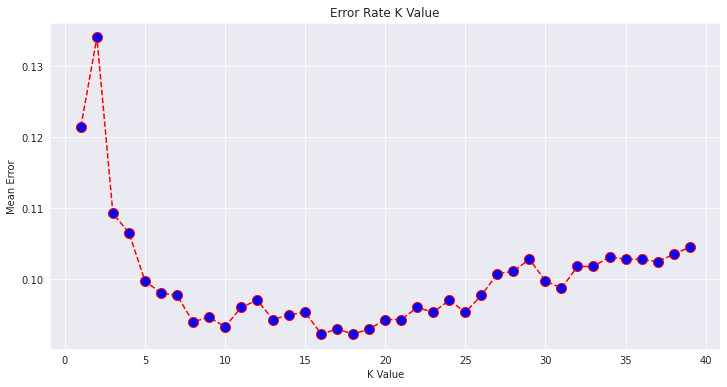

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the graphical representation, I chose to use k = 16 since it gives the least mean error.

In [29]:
classifier = KNeighborsClassifier(n_neighbors = 16 , weights = "distance" , n_jobs = -2, p = 1)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-2, n_neighbors=16, p=1, weights='distance')

In [30]:
y_pred = classifier.predict(x_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[537   0   0   0   0   0]
 [  1 407  81   0   0   2]
 [  0  15 517   0   0   0]
 [  0   0   0 488   6   2]
 [  0   0   0  40 327  53]
 [  0   0   0  37   2 432]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.83      0.89       491
          STANDING       0.86      0.97      0.92       532
           WALKING       0.86      0.98      0.92       496
WALKING_DOWNSTAIRS       0.98      0.78      0.87       420
  WALKING_UPSTAIRS       0.88      0.92      0.90       471

          accuracy                           0.92      2947
         macro avg       0.93      0.91      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



-------

Given the **data** above it's observable that the **Model** performed well with an **accuracy of 92%**.

----------